# Sparse Hebbian Learning with full homeostasis : testing different rescaling functions

In this notebook, we test the convergence of SparseNet as a function of different parameters tuning the quantization. These parameters only influence the way we select dictionary elements and thus the homeostasis.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 0
tag = 'rescaling'

N_scan = 7
n_jobs = 1
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method='HEH', homeo_params=dict(eta_homeo=0.05, alpha_homeo=0.02, C=5., nb_quant=128), verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

In [3]:
!ls -l data_cache/{tag}*

-rw-r--r--  1 lolo  staff  2114138 Dec 22 23:49 data_cache/rescaling - eta_homeo=19.49467310117367_dico.pkl
-rw-r--r--  1 lolo  staff  2114138 Dec 23 01:22 data_cache/rescaling - eta_homeo=194.94673101173666_dico.pkl
-rw-r--r--  1 lolo  staff  2114138 Dec 22 22:43 data_cache/rescaling - eta_homeo=4.2_dico.pkl
-rw-r--r--  1 lolo  staff  2114138 Dec 23 00:20 data_cache/rescaling - eta_homeo=42.0_dico.pkl
-rw-r--r--  1 lolo  staff  2114138 Dec 23 01:54 data_cache/rescaling - eta_homeo=420.0_dico.pkl
-rw-r--r--  1 lolo  staff  2114138 Dec 22 23:17 data_cache/rescaling - eta_homeo=9.048625698133911_dico.pkl
-rw-r--r--  1 lolo  staff  2114138 Dec 23 00:51 data_cache/rescaling - eta_homeo=90.4862569813391_dico.pkl
-rw-r--r--  1 lolo  staff  2114167 Dec 23 04:28 data_cache/rescaling - nb_quant=128_dico.pkl
-rw-r--r--  1 lolo  staff  1823863 Dec 23 02:55 data_cache/rescaling - nb_quant=16_dico.pkl
-rw-r--r--  1 lolo  staff  2445944 Dec 23 04:59 data_cache/rescaling - nb_quant=256_dico.pkl
-rw-r

In [4]:
homeo_params = shl.homeo_params
homeo_params

{'C': 5.0, 'alpha_homeo': 0.02, 'eta_homeo': 0.05, 'nb_quant': 128}

We will use the ``joblib`` package do distribute this computation on different CPUs.

## different rescaling values

## different quantization parameters

with a fixed $C=5.$

In [5]:
shl = SHL(**opts)
homeo_params = shl.homeo_params
homeo_params

{'C': 5.0, 'alpha_homeo': 0.02, 'eta_homeo': 0.05, 'nb_quant': 128}

In [6]:
print(homeo_params.update(eta_homeo=42))

None


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


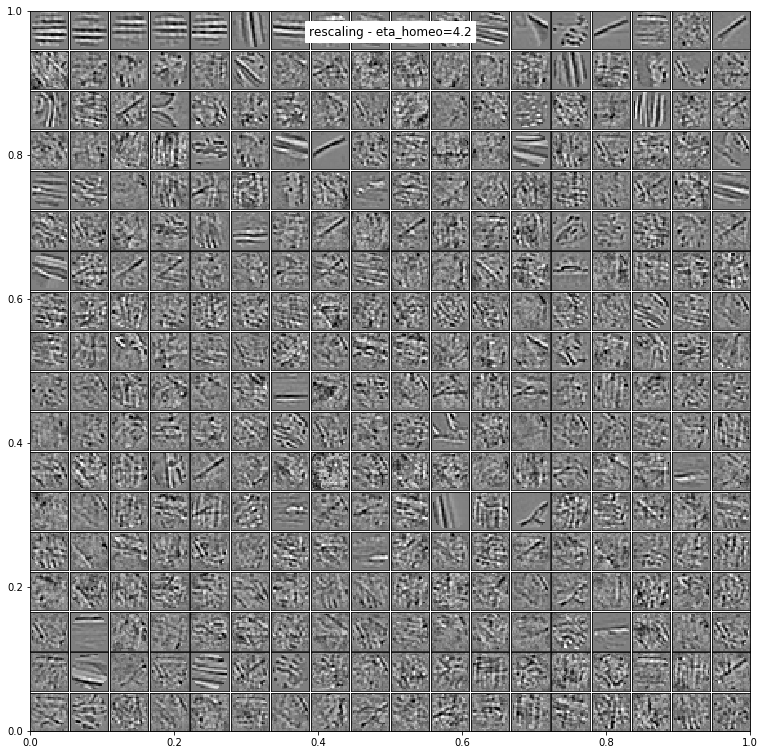

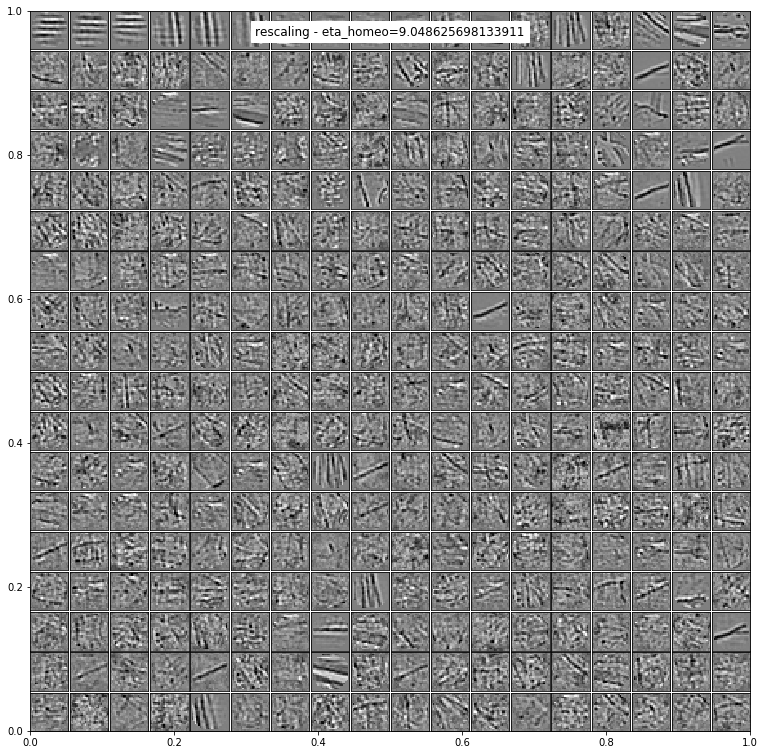

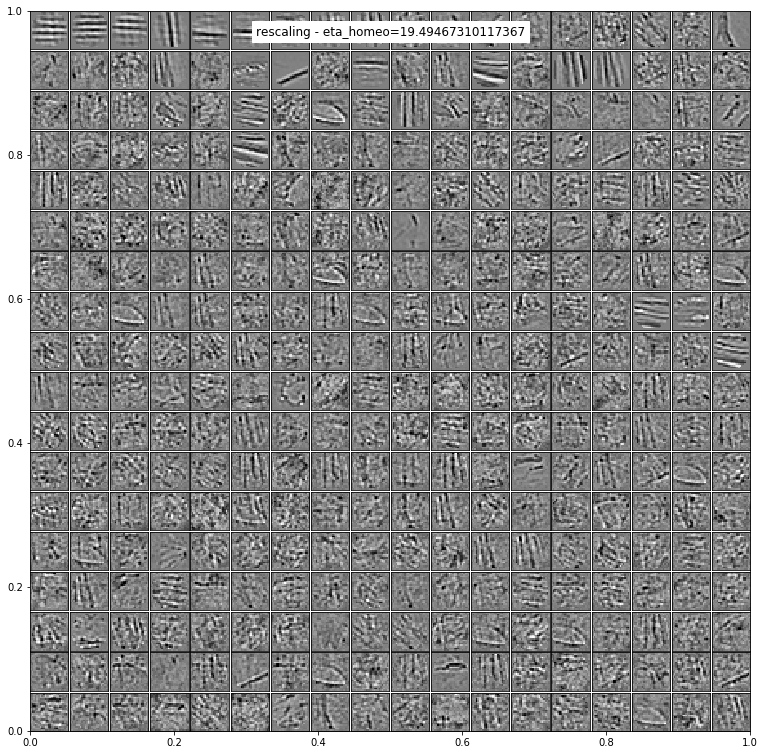

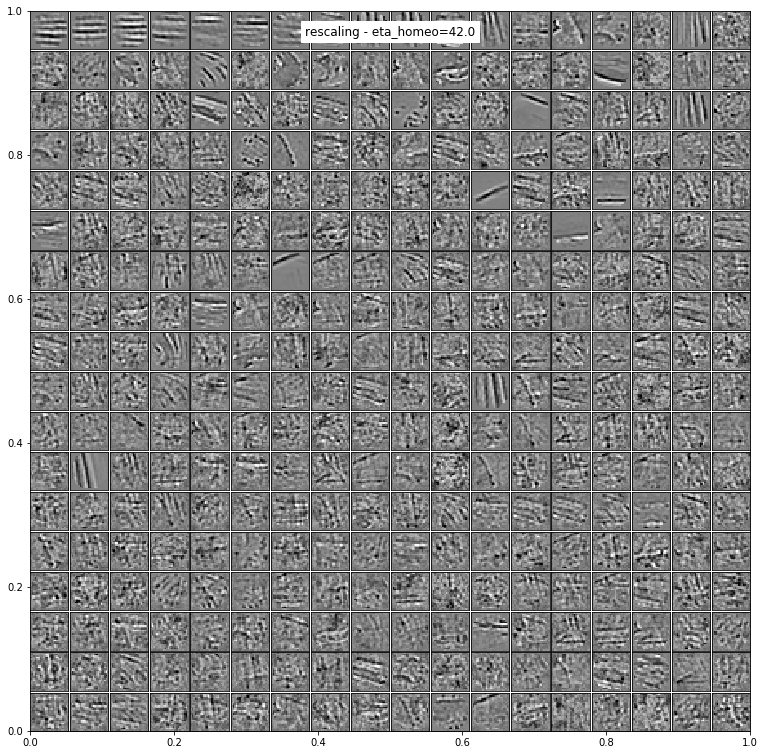

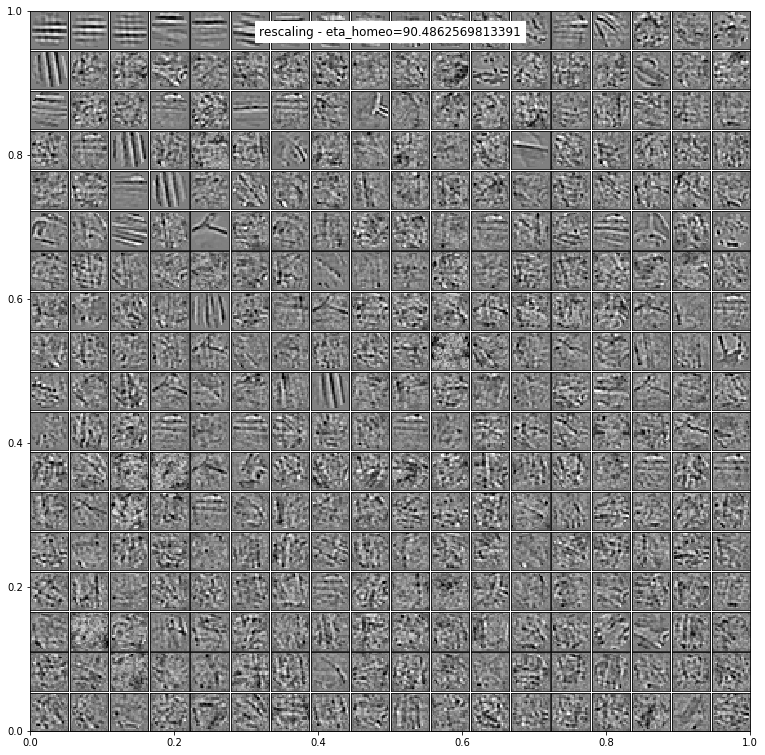

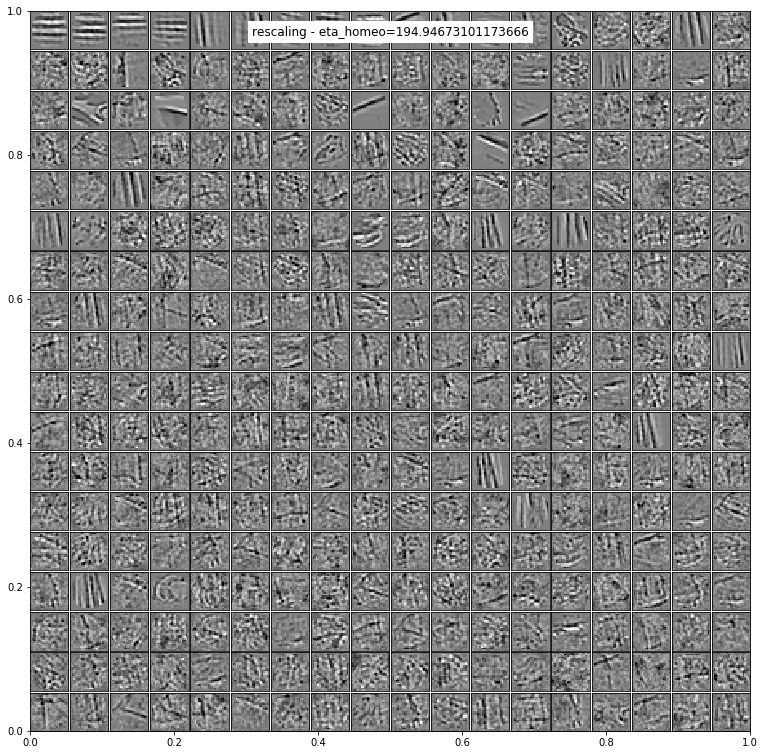

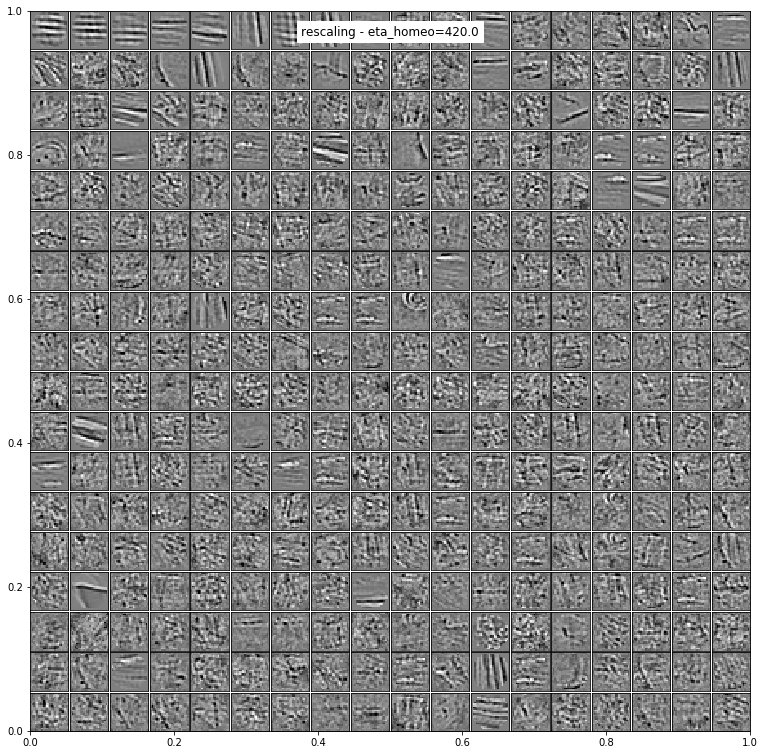

In [7]:
shl = SHL(**opts)
for eta_homeo in np.logspace(-1, 1, N_scan, base=10)*shl.homeo_params['eta_homeo']:
    matname = tag + ' - eta_homeo={eta_homeo}'.format(eta_homeo=eta_homeo)
    homeo_params=shl.homeo_params
    homeo_params.update(eta_homeo=eta_homeo)
    opts.update(homeo_params=homeo_params)
    shl = SHL(**opts)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


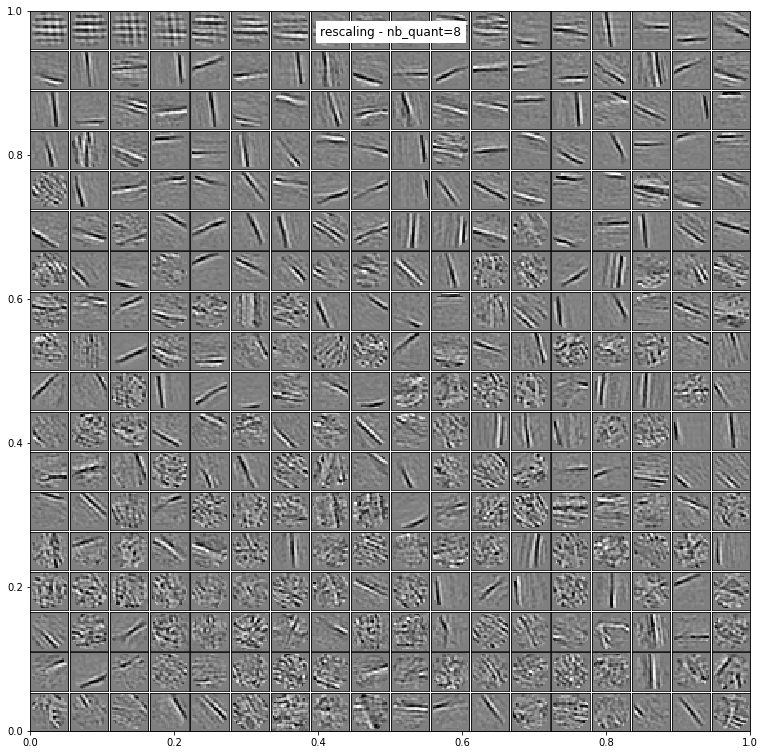

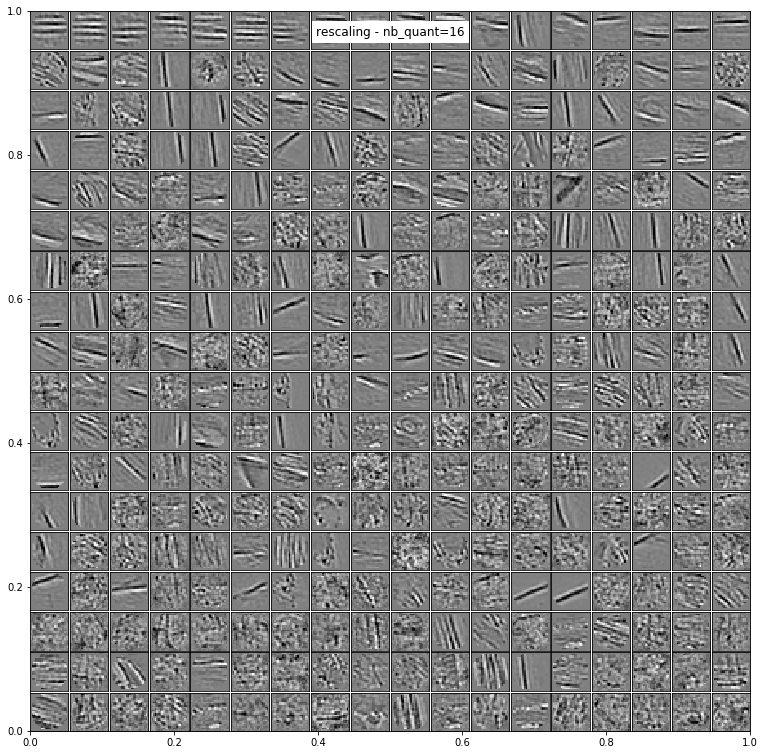

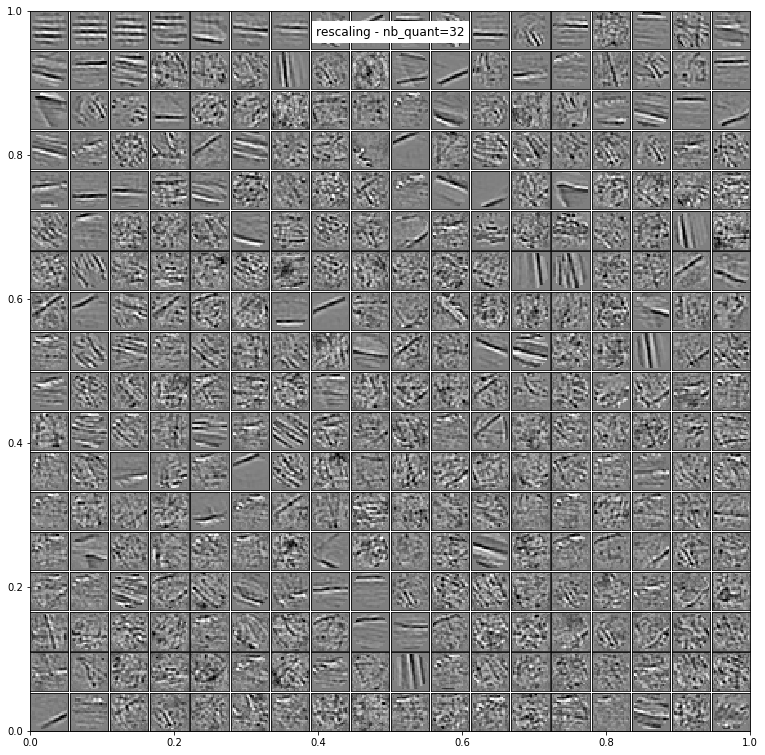

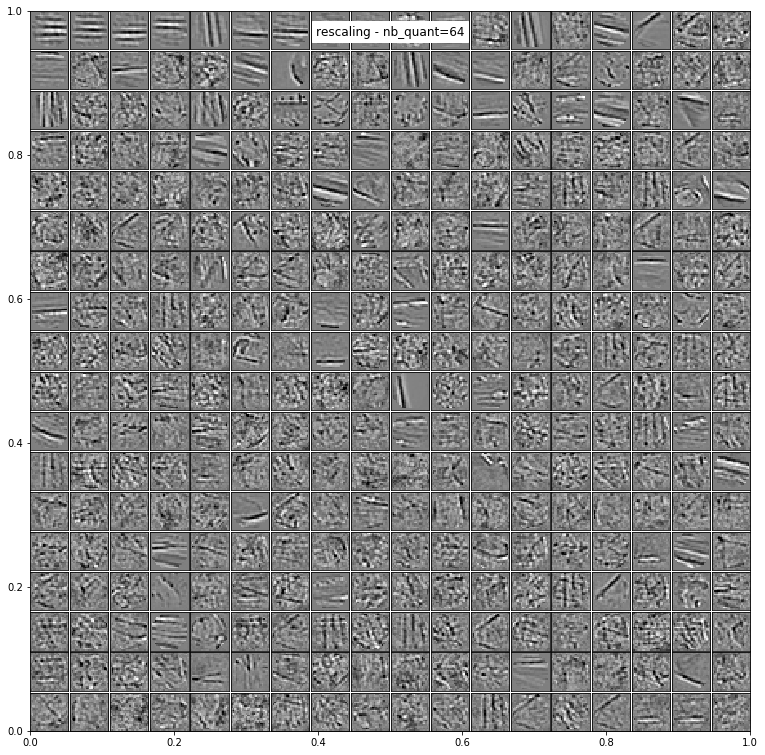

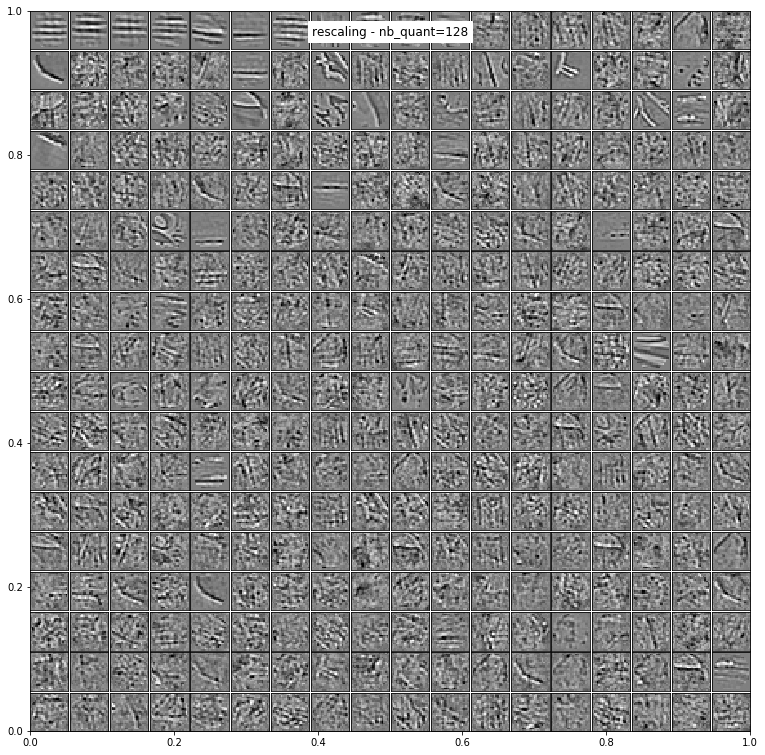

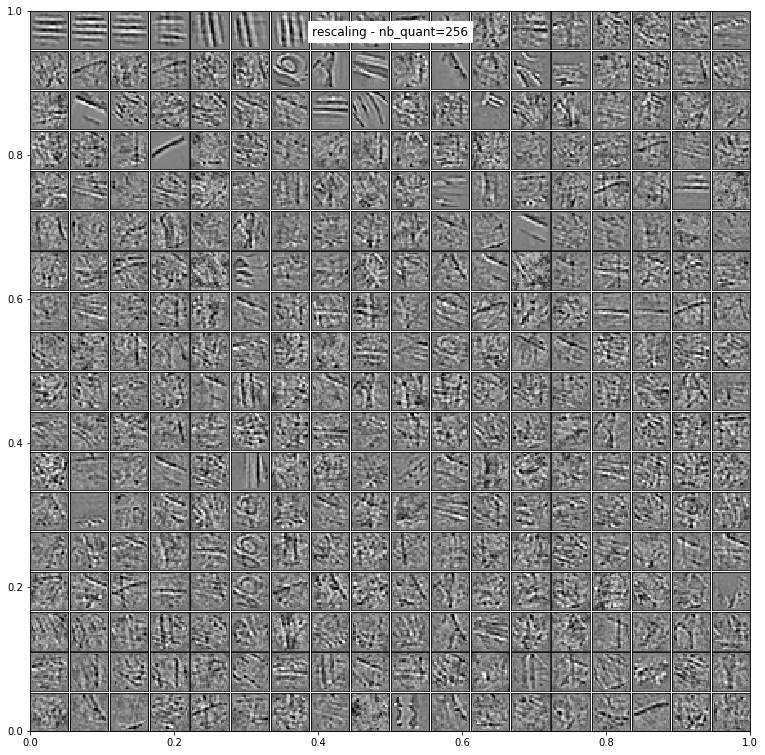

In [8]:
nb_quants = 2 ** np.arange(3, 9)
opts_ = opts.copy()
for nb_quant in  nb_quants:
    matname = tag + ' - nb_quant={}'.format(nb_quant)
    homeo_params = shl.homeo_params
    homeo_params.update(C=5.)
    homeo_params.update(nb_quant=nb_quant)
    opts.update(homeo_params=homeo_params)
    shl = SHL(**opts)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    plt.show()

with an adaptive rescaling function ($C=0.$)

In [9]:
shl = SHL(**opts)
opts_ = opts.copy()

from joblib import Parallel, delayed
def run(shl, nb_quant, list_figures, data):
    matname = tag + ' - auto - nb_quant={}'.format(nb_quant)
    homeo_params = shl.homeo_params
    homeo_params.update(C=0.)
    homeo_params.update(nb_quant=nb_quant)
    opts_.update(homeo_params=homeo_params)
    shl = SHL(**opts_)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    return dico

nb_quants = 2 ** np.arange(3, 9)
if not n_jobs==1: out = Parallel(n_jobs=n_jobs, verbose=15)(delayed(run)(shl, int(nb_quant), [], data) for nb_quant in  nb_quants)

for nb_quant in  nb_quants:
    dico = run(shl, nb_quant, list_figures, data)
    plt.show()

index -9223372036854775808 is out of bounds for axis 1 with size 2592


UnboundLocalError: local variable 'floor' referenced before assignment

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts